In [ ]:
# Homework 5
#
# This homework assignment is for the practice section of homework 5 at the University of Utah in CS6350 Machine Learning.
# This code will covering:
#    1. Neural Networks
#
# @author  Scott Merkley
# @version December 08, 2024

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# Make sure that the file you are trying to download is viewable to anyone with the link.
def Download_From_Google_Drive(file_id):
  return 'https://drive.google.com/uc?export=download&id=' + file_id

# **Creating Neural Network Class**

In [282]:
  class NN:
    def __init__(self, layer_sizes, learning_rate, initialize_weights_to_zero = False):
      self.layer_sizes                = layer_sizes  # Should be [# for first layer, # for second layer, # for output layer] (ie. [3, 3, 1])
      self.learning_rate              = learning_rate
      self.initialize_weights_to_zero = initialize_weights_to_zero

      # Weights, Biases, and Activations
      self.W1 = None
      self.b1 = None
      self.a1 = None
      self.z1 = None
      self.W2 = None
      self.b2 = None
      self.a2 = None
      self.z2 = None
      self.W3 = None
      self.b3 = None
      self.a3 = None
      self.z3 = None


    # Create the sigmoid function
    def sigmoid(self, z):
      z = np.clip(z, -500, 500)
      return 1 / (1 + np.exp(-z))

    # Create the sigmoid derivative function
    def sigmoid_derivative(self, z):
      s = self.sigmoid(z)
      return s * (1 - s)


    # This helper method initializes the neural network by finding the number of rows, number of columns, and returning y as an
    # array that contains {-1, 1} instead of {0, 1}. By changing y, you can easily calculate the new weights by just multiplying
    # your learning rate by y[i] instead of having to do math behind the scenes.
    #
    def initialize(self, X, y):
      if not self.initialize_weights_to_zero:
        self.W1 = np.random.randn(X.shape[1], self.layer_sizes[0])
        self.b1 = np.zeros((1, self.layer_sizes[0]))
        self.W2 = np.random.randn(self.layer_sizes[0], self.layer_sizes[1])
        self.b2 = np.zeros((1, self.layer_sizes[1]))
        self.W3 = np.random.randn(self.layer_sizes[1], self.layer_sizes[2])
        self.b3 = np.zeros((1, self.layer_sizes[2]))

      else:
        self.W1 = np.zeros((X.shape[1], self.layer_sizes[0]))
        self.b1 = np.zeros((1, self.layer_sizes[0]))
        self.W2 = np.zeros((self.layer_sizes[0], self.layer_sizes[1]))
        self.b2 = np.zeros((1, self.layer_sizes[1]))
        self.W3 = np.zeros((self.layer_sizes[1], self.layer_sizes[2]))
        self.b3 = np.zeros((1, self.layer_sizes[2]))

      y = np.where(y <= 0, -1, 1) # Converting labels to -1 or 1 so it is easier to compute weights and bias
      return y


    # Run the forward pass on the dataset.
    #
    def forward_pass(self, X):
      # print("X.shape:", X.shape, "W1.shape", self.W1.shape)
      self.z1 = np.dot(X, self.W1) + self.b1
      self.a1 = self.sigmoid(self.z1)

      self.z2 = np.dot(self.a1, self.W2) + self.b2
      self.a2 = self.sigmoid(self.z2)

      self.z3 = np.dot(self.z2, self.W3) + self.b3
      self.a3 = self.sigmoid(self.z3)

      return self.a3


    # Run the backpropagation on the dataset. Get the gradients.
    #
    def backprop(self, X, y):
      m = X.shape[0]

      dz3 = self.a3 - y.reshape(-1, 1)
      dw3 = np.dot(self.a2.T, dz3) / m
      db3 = np.sum(dz3, axis = 0, keepdims = True) / m

      dz2 = np.dot(dz3, self.W3.T) * self.sigmoid_derivative(self.z2)
      dw2 = np.dot(self.a1.T, dz2) / m
      db2 = np.sum(dz2, axis = 0, keepdims = True) / m

      dz1 = np.dot(dz2, self.W2.T) * self.sigmoid_derivative(self.z1)
      dw1 = np.dot(X.T, dz1) / m
      db1 = np.sum(dz1, axis = 0, keepdims = True) / m

      # Update weights and biases
      self.W1 -= self.learning_rate * dw1
      self.b1 -= self.learning_rate * db1
      self.W2 -= self.learning_rate * dw2
      self.b2 -= self.learning_rate * db2
      self.W3 -= self.learning_rate * dw3
      self.b3 -= self.learning_rate * db3



    # Train trains the model using the neural networks. This first initializes the weights, then
    # runs the dataset through a number of epochs, calculating predictions and then updating the
    # weights to get a better calculation and predictions when predicting values.
    #
    def train(self, X, y, epochs):
      y = self.initialize(X, y)

      for epoch in range(epochs):

        permutation = np.random.permutation(X.shape[0])
        X_shuffle = X[permutation]
        y_shuffle = y[permutation]

        # Run the forward pass and backprop
        self.forward_pass(X_shuffle)
        self.backprop(X_shuffle, y_shuffle)

        self.update_user(epoch, epochs)


    # Prints out 'Current epoch: #' to the user in steps but will only print out 10 total steps depending
    # on the number of epochs initialized in the perceptron.
    #
    def update_user(self, epoch, epochs):
      # Visually Update
      if epoch % (epochs // 10) == 0 and False:
        print(f'Current epoch: {epoch}')


    # Returns the weights and bias to the user.
    #
    def get_weights_and_bias(self, X, y):
      return self.weights, self.bias


    # Predicts the next value given a test example X.
    #
    def predict(self, X):
      probs = self.forward_pass(X)
      return np.where(probs > 0.5, 1, 0)

# **Downloading bank-note.csv from Google Drive**

In [133]:
columns = ["Variance", "Skewness", "Curtosis", "Entropy", "Label"]
bank_note_train = pd.read_csv(Download_From_Google_Drive('1Du3SiMaZGn-HuvFUJchE6NNwiIdRlQbh'), names = columns)
bank_note_test = pd.read_csv(Download_From_Google_Drive('1mX8lXt2TvYGyDBihyGOTMnYRiGdzeoKr'), names = columns)
print(bank_note_train)

# Training Datasets
X_train = bank_note_train.drop('Label', axis = 1).values
y_train = bank_note_train['Label'].values

# Testing Datasets
X_test = bank_note_test.drop('Label', axis = 1).values
y_test = bank_note_test['Label'].values

     Variance  Skewness  Curtosis  Entropy  Label
0    3.848100  10.15390  -3.85610 -4.22280      0
1    4.004700   0.45937   1.36210  1.61810      0
2   -0.048008  -1.60370   8.47560  0.75558      0
3   -1.266700   2.81830  -2.42600 -1.88620      1
4    2.203400   5.99470   0.53009  0.84998      0
..        ...       ...       ...      ...    ...
867  0.273310   4.87730  -4.91940 -5.81980      1
868  1.063700   3.69570  -4.15940 -1.93790      1
869 -1.242400  -1.71750  -0.52553 -0.21036      1
870  1.837300   6.12920   0.84027  0.55257      0
871 -2.014900   3.68740  -1.93850 -3.89180      1

[872 rows x 5 columns]


# **Implementing NN**

In [333]:
# Create a NN
nn = NN(layer_sizes = [10, 10, 1], learning_rate = 1)
nn.train(X_train, y_train, epochs = 100)

# print('\nWeights:', nn.weights)
# print('Bias:', nn.bias)
correct = np.sum((y_test == nn.predict(X_test).reshape(1, -1)[0])) / len(X_test) * 100
print(f"Percent Correct: {correct:0.3}%")

Percent Correct: 98.2%


# **Varying the Number of Nodes**

In [277]:
percent_correct = []
num_of_nodes = [5, 10, 25, 50, 100]

for nodes in num_of_nodes:
  nn = NN(layer_sizes = [nodes, nodes, 1], learning_rate = 1)
  nodes_percent_correct = []
  for i in range(10):
    # Create a NN
    nn.train(X_train, y_train, epochs = 100)

    # print('\nWeights:', nn.weights)
    # print('Bias:', nn.bias)
    correct = np.sum((y_test == nn.predict(X_test).reshape(1, -1)[0])) / len(X_test) * 100
    nodes_percent_correct.append(correct)

  percent_correct.append(np.average(np.array(nodes_percent_correct)))


for i in range(len(num_of_nodes)):
  print(f"{num_of_nodes[i]} nodes: {percent_correct[i]:0.3}%")

5 nodes: 97.1%
10 nodes: 94.4%
25 nodes: 98.6%
50 nodes: 96.8%
100 nodes: 96.2%


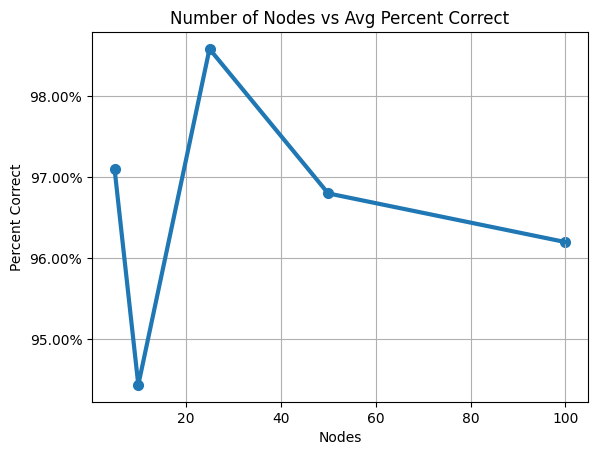

In [278]:
from matplotlib.ticker import PercentFormatter

print("\n\n")
plt.plot(num_of_nodes, np.array(percent_correct) / 100, lw = 3)
plt.scatter(num_of_nodes, np.array(percent_correct) / 100, lw = 2)
plt.title("Number of Nodes vs Avg Percent Correct")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel("Nodes")
plt.ylabel("Percent Correct")
plt.grid()

# **Initialize Weights to Zero**

In [286]:
percent_correct = []
num_of_nodes = [5, 10, 25, 50, 100]

for nodes in num_of_nodes:
  nn = NN(layer_sizes = [nodes, nodes, 1], learning_rate = 1, initialize_weights_to_zero = True)
  nodes_percent_correct = []
  for i in range(10):
    # Create a NN
    nn.train(X_train, y_train, epochs = 100)

    # print('\nWeights:', nn.weights)
    # print('Bias:', nn.bias)
    correct = np.sum((y_test == nn.predict(X_test).reshape(1, -1)[0])) / len(X_test) * 100
    nodes_percent_correct.append(correct)

  percent_correct.append(np.average(np.array(nodes_percent_correct)))


for i in range(len(num_of_nodes)):
  print(f"{num_of_nodes[i]} nodes: {percent_correct[i]:0.3}%")

5 nodes: 93.9%
10 nodes: 96.8%
25 nodes: 96.0%
50 nodes: 94.4%
100 nodes: 97.7%


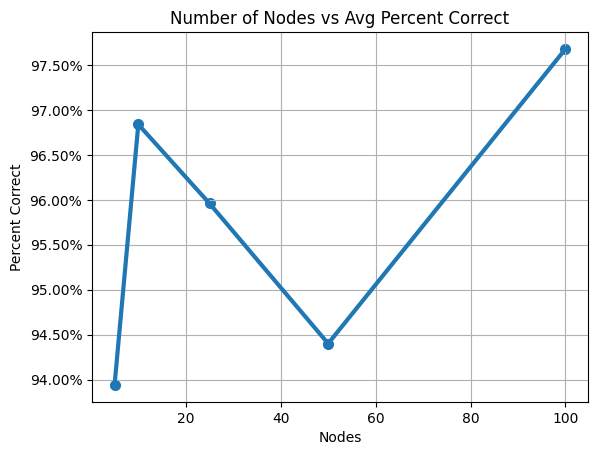

In [287]:
from matplotlib.ticker import PercentFormatter

print("\n\n")
plt.plot(num_of_nodes, np.array(percent_correct) / 100, lw = 3)
plt.scatter(num_of_nodes, np.array(percent_correct) / 100, lw = 2)
plt.title("Number of Nodes vs Avg Percent Correct")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel("Nodes")
plt.ylabel("Percent Correct")
plt.grid()

# **BONUS: Creating a Neural Network Class using PyTorch**

In [330]:
import torch
import torch.nn.functional as F


class Simple_PyTorch_NN:
  def __init__(self, layer_sizes, learning_rate, activation_method = "ReLU"):
    self.layer_sizes       = layer_sizes        # Should be [# for first layer, # for second layer, # for output layer] (ie. [3, 3, 1])
    self.learning_rate     = learning_rate
    self.activation_method = activation_method

    # Weights, Biases, and Activations
    self.W1 = None
    self.b1 = None
    self.a1 = None
    self.z1 = None
    self.W2 = None
    self.b2 = None
    self.a2 = None
    self.z2 = None
    self.W3 = None
    self.b3 = None
    self.a3 = None
    self.z3 = None


  # Create the sigmoid function
  def activation_function(self, z):
    if self.activation_method == "ReLU":
      return torch.relu(z)
    else:
      return torch.tanh(z)

  # Create the sigmoid derivative function
  def activation_function_derivative(self, z):
    if self.activation_method == "ReLU":
      return (z > 0).float()
    else:
      t = torch.tanh(z)
      return 1 - t * t


  # This helper method initializes the neural network by finding the number of rows, number of columns, and returning y as an
  # array that contains {-1, 1} instead of {0, 1}. By changing y, you can easily calculate the new weights by just multiplying
  # your learning rate by y[i] instead of having to do math behind the scenes.
  #
  def initialize(self, X, y):
    self.W1 = torch.randn((X.shape[1], self.layer_sizes[0]), requires_grad = False)
    self.b1 = torch.randn((1, self.layer_sizes[0]), requires_grad = False)
    self.W2 = torch.randn((self.layer_sizes[0], self.layer_sizes[1]), requires_grad = False)
    self.b2 = torch.randn((1, self.layer_sizes[1]), requires_grad = False)
    self.W3 = torch.randn((self.layer_sizes[1], self.layer_sizes[2]), requires_grad = False)
    self.b3 = torch.randn((1, self.layer_sizes[2]), requires_grad = False)

    y = np.where(y <= 0, -1, 1) # Converting labels to -1 or 1 so it is easier to compute weights and bias

    X_torch = torch.from_numpy(X).float()
    y_torch = torch.from_numpy(y).float()
    return X_torch, y_torch


  # Run the forward pass on the dataset.
  #
  def forward_pass(self, X):
    # print("X.shape:", X.shape, "W1.shape", self.W1.shape)
    self.z1 = X @ self.W1 + self.b1
    self.a1 = self.activation_function(self.z1)

    self.z2 = self.a1 @ self.W2 + self.b2
    self.a2 = self.activation_function(self.z2)

    self.z3 = self.z2 @ self.W3 + self.b3
    self.a3 = self.activation_function(self.z3)

    return self.a3


  # Run the backpropagation on the dataset.
  #
  def backprop(self, X, y):
    m = X.shape[0]

    dz3 = self.a3 - y.view(-1, 1)
    dw3 = self.a2.T @ dz3 / m
    db3 = dz3.sum(axis = 0, keepdims = True) / m

    dz2 = dz3 @ self.W3.T * self.activation_function_derivative(self.z2)
    dw2 = self.a1.T @ dz2 / m
    db2 = dz2.sum(axis = 0, keepdims = True) / m

    dz1 = dz2 @ self.W2.T * self.activation_function_derivative(self.z1)
    dw1 = X.T @ dz1 / m
    db1 = dz1.sum(axis = 0, keepdims = True) / m

    # Update weights and biases
    self.W1 -= self.learning_rate * dw1
    self.b1 -= self.learning_rate * db1
    self.W2 -= self.learning_rate * dw2
    self.b2 -= self.learning_rate * db2
    self.W3 -= self.learning_rate * dw3
    self.b3 -= self.learning_rate * db3



  # Train trains the model using the neural networks. This first initializes the weights, then
  # runs the dataset through a number of epochs, calculating predictions and then updating the
  # weights to get a better calculation and predictions when predicting values.
  #
  def train(self, X, y, epochs):
    X, y = self.initialize(X, y)

    for epoch in range(epochs):

      permutation = np.random.permutation(X.size(0))
      X_shuffle = X[permutation]
      y_shuffle = y[permutation]

      # Run the forward pass and backprop
      self.forward_pass(X_shuffle)
      self.backprop(X_shuffle, y_shuffle)


  # Returns the weights and bias to the user.
  #
  def get_weights_and_bias(self, X, y):
    return self.weights, self.bias


  # Predicts the next value given a test example X.
  #
  def predict(self, X):
    X_torch = torch.from_numpy(X).float()
    probs = self.forward_pass(X_torch).detach().numpy()
    return np.where(probs > 0.5, 1, 0)

In [331]:
percent_correct = []
num_of_nodes = [5, 10, 25, 50, 100]

for nodes in num_of_nodes:
  nn = Simple_PyTorch_NN(layer_sizes = [nodes, nodes, 1], learning_rate = 1, activation_method = "tanh")
  nodes_percent_correct = []
  for i in range(10):
    # Create a NN
    nn.train(X_train, y_train, epochs = 100)

    # print('\nWeights:', nn.weights)
    # print('Bias:', nn.bias)
    correct = np.sum((y_test == nn.predict(X_test).reshape(1, -1)[0])) / len(X_test) * 100
    nodes_percent_correct.append(correct)

  percent_correct.append(np.average(np.array(nodes_percent_correct)))


for i in range(len(num_of_nodes)):
  print(f"{num_of_nodes[i]} nodes: {percent_correct[i]:0.3}%")

5 nodes: 98.9%
10 nodes: 98.8%
25 nodes: 99.9%
50 nodes: 99.7%
100 nodes: 99.4%


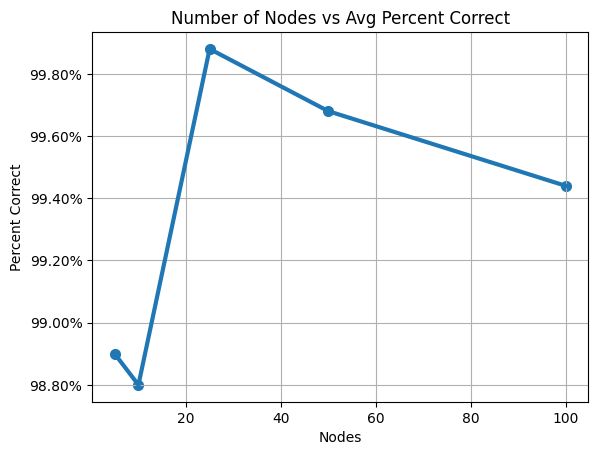

In [332]:
from matplotlib.ticker import PercentFormatter

print("\n\n")
plt.plot(num_of_nodes, np.array(percent_correct) / 100, lw = 3)
plt.scatter(num_of_nodes, np.array(percent_correct) / 100, lw = 2)
plt.title("Number of Nodes vs Avg Percent Correct")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel("Nodes")
plt.ylabel("Percent Correct")
plt.grid()